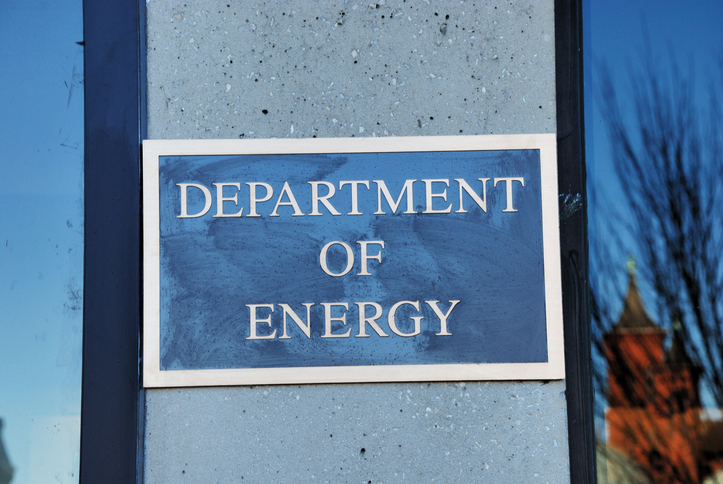

You've recently started a new position as a Data Engineer at an energy company. Previously, analysts on other teams had to manually retrieve and clean data every quarter to understand changes in the sales and capability of different energy types. This process normally took days and was something that most analytsts dreaded. Your job is to automate this process by building a data pipeline. You'll write this data pipeline to pull data each month, helping to provide more rapid insights and free up time for your data consumers.

You will achieve this using the `pandas` library and its powerful parsing features. You'll be working with two raw files; `electricity_sales.csv` and `electricity_capability_nested.json`. 
    
Below, you'll find a data dictionary for the `electricity_sales.csv` dataset, which you'll be transforming in just a bit. Good luck!

| Field | Data Type |
| :---- | :-------: |
| period  | `str`        |
| stateid | `str` |
| stateDescription | `str` |
| sectorid | `str` |
| sectorName | `str` |
| price | `float` |
| price-units | `str` |

## How to approach the project
1. Extracting data from tabular files

2. Extracting and flattening JSON data

3. Transforming electricity sales data

4. Saving data to a file

In [12]:
import pandas as pd
import json

### 1. Extracting data from tabular files
Write a function to extract data from `.csv` and `.parquet` files. The function should read the file based on its extension and return the data as a pandas DataFrame. If the file extension is invalid, raise an exception with an appropriate error message.

Reading data from .csv files
- Use the `pd.read_csv()` function to load data from files with a `.csv` extension. Pass the `file_path` argument to this function

Reading data from .parquet files
- Use the `pd.read_parquet()` function to load data from `.parquet` files. Pass the `file_path` argument to this function

Checking the file extension
- Use the .endswith() method to check whether the file path ends with `.csv` or `.parquet`

In [13]:
# Function to extract data from a tabular file (CSV or Parquet format)
# If the file extension is invalid, it raises an exception with a warning message.

def extract_tabular_data(file_path: str):
    """Extract data from a tabular file_format, with pandas."""
    if file_path.endswith(".csv"):
        return pd.read_csv(file_path)
    elif file_path.endswith(".parquet"):
        return pd.read_parquet(file_path)
    else:
        raise Exception("Warning: Invalid file extension. Please try with .csv or .parquet!")
        
# function call
display(extract_tabular_data('electricity_sales.csv').head())

,period,stateid,stateDescription,sectorid,sectorName,price,price-units
0,2023-12,HI,Hawaii,TRA,transportation,0.00,cents per kilowatt-hour
1,2023-12,ID,Idaho,ALL,all sectors,9.46,cents per kilowatt-hour
2,2023-12,ID,Idaho,COM,commercial,8.88,cents per kilowatt-hour
3,2023-12,ID,Idaho,IND,industrial,6.21,cents per kilowatt-hour
4,2023-12,ID,Idaho,OTH,other,NaN,cents per kilowatt-hour


In [14]:
csv_info = pd.read_csv('electricity_sales.csv').info()
csv_info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4836 entries, 0 to 4835
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   period            4836 non-null   object 
 1   stateid           4836 non-null   object 
 2   stateDescription  4836 non-null   object 
 3   sectorid          4836 non-null   object 
 4   sectorName        4836 non-null   object 
 5   price             4030 non-null   float64
 6   price-units       4836 non-null   object 
dtypes: float64(1), object(6)
memory usage: 264.6+ KB


### 2. Extracting and flattening JSON data
Write a function to extract data from a nested JSON file and flatten it into a pandas DataFrame.

Reading the JSON file
- Use Python's `json` library to open and read the JSON file. Pass the `file_path` as an argument to `open()`

Flattening JSON data
- Use the `pd.json_normalize()` function to convert nested JSON data into a flat structure. Pass the `raw_data` dictionary to this function

Returning the DataFrame
- Return the flattened DataFrame so it can be used for further analysis

In [15]:
# Function to extract and flatten data from a JSON file
# Converts nested JSON data into a pandas DataFrame using json_normalize().

# Make sure that extract_json_data() takes a single parameter, file_path
def extract_json_data(file_path):
    """Extract and flatten data from a JSON file."""
    # First, read in the JSON file into memory using the json library
    with open(file_path, "r") as json_file:
        raw_data = json.load(json_file)
    
    return pd.json_normalize(raw_data)

display(extract_json_data('electricity_capability_nested.json').head())

,period,stateId,statstateDescriptione,energySource.id,energySource.description,energySource.capability,energySource.capabilityUnits
0,2023,WI,Wisconsin,SOL,Solar,1442.6,megawatts
1,2023,WI,Wisconsin,SOLPV,Solar - PV,1442.6,megawatts
2,2023,WI,Wisconsin,WND,Wind,636.5,megawatts
3,2023,WI,Wisconsin,WOO,Wood,124.6,megawatts
4,2023,WI,Wisconsin,ALL,All,2140.9,megawatts


In [16]:
import pandas as pd
import json

# Load the JSON data from the file
with open('electricity_capability_nested.json') as f:
    data = json.load(f)

# Normalize the JSON data
json_info = pd.json_normalize(data)

# Display the DataFrame info
json_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2352 entries, 0 to 2351
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   period                        2352 non-null   object
 1   stateId                       2352 non-null   object
 2   statstateDescriptione         2352 non-null   object
 3   energySource.id               2352 non-null   object
 4   energySource.description      2352 non-null   object
 5   energySource.capability       2352 non-null   object
 6   energySource.capabilityUnits  2352 non-null   object
dtypes: object(7)
memory usage: 128.8+ KB


### 3. Transforming electricity sales data
Write a function to clean and transform electricity sales data. This includes filtering for specific sectors, handling missing values, and adding year/month columns derived from the `period` column.

Dropping missing values
- Use the `.dropna()` method to remove records with missing values in the `price` column. Example: raw_data.dropna(subset=["price"], inplace=True)

Filtering specific sectors
- Use `.loc[]` to filter rows where `sectorName` is either "residential" or "transportation". 

Extracting year and month
- Use `.str[]` slicing to extract the `year` and `month` from the `period` column. 

Selecting relevant columns
- Use `.loc[]` to keep only the columns `year`, `month`, `stateid`, `price`, and `price-units`.

Returning the cleaned DataFrame
- Return the transformed DataFrame after performing all the necessary operations.

In [17]:
# Function to transform electricity sales data
# Drops records with missing values, filters specific sectors, extracts year/month, and selects relevant columns.  

def transform_electricity_sales_data(raw_data: pd.DataFrame):
    """
    Transform electricity sales to find the total amount of electricity sold
    in the residential and transportation sectors.
    
    To transform the electricity sales data, you'll need to do the following:
    - Drop any records with NA values in the `price` column. Do this inplace.
    - Only keep records with a `sectorName` of "residential" or "transportation".
    - Create a `month` column using the first 4 characters of the values in `period`.
    - Create a `year` column using the last 2 characters of the values in `period`.
    - Return the transformed `DataFrame`, keeping only the columns `year`, `month`, `stateid`, `price` and `price-units`.
    """
    # Drop any records with a null value
    raw_data.dropna(subset=["price"], inplace=True)
    
    # Only keep residential and transformation records
    cleaned_df = raw_data.loc[raw_data["sectorName"].isin(["residential", "transportation"]), :]
    
    # Create year and month columns
    cleaned_df["year"] = cleaned_df["period"].str[0:4]
    cleaned_df["month"] = cleaned_df["period"].str[5:]
    
    cleaned_df = cleaned_df.loc[:, ['year', 'month', 'stateid', 'price', 'price-units']]
    
    return cleaned_df

# Load the data from CSV
electricity_sales_data = pd.read_csv('electricity_sales.csv')

# Display the transformed data
display(transform_electricity_sales_data(electricity_sales_data).head())

,year,month,stateid,price,price-units
0,2023,12,HI,0.00,cents per kilowatt-hour
5,2023,12,ID,11.53,cents per kilowatt-hour
6,2023,12,ID,0.00,cents per kilowatt-hour
11,2023,12,IL,14.84,cents per kilowatt-hour
12,2023,12,IL,7.29,cents per kilowatt-hour


In [18]:
electricity_sales_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4030 entries, 0 to 4835
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   period            4030 non-null   object 
 1   stateid           4030 non-null   object 
 2   stateDescription  4030 non-null   object 
 3   sectorid          4030 non-null   object 
 4   sectorName        4030 non-null   object 
 5   price             4030 non-null   float64
 6   price-units       4030 non-null   object 
dtypes: float64(1), object(6)
memory usage: 251.9+ KB


### 4. Saving data to a file
Write a function to save a DataFrame to a file in either `.csv` or `.parquet` format. Ensure the file extension is valid and raise an exception if it is not.

Saving as .csv
- Use the `.to_csv()` method to save the DataFrame to a CSV file. Pass the `file_path` argument to the method.

Saving as .parquet
- Use the `.to_parquet()` method to save the DataFrame to a Parquet file. Pass the `file_path` argument to the method. 

Checking the file extension
- Use .endswith() to check whether the file_path ends with .csv or .parquet

Raising an exception for invalid extensions
- If the file extension is not valid, raise an exception with the message: `Warning: {file_path} is not a valid file type. Please try again!`

In [21]:
# Function to load a DataFrame to a file (CSV or Parquet format)
# Raises an exception if the file extension is invalid.  
 
def load(dataframe: pd.DataFrame, file_path: str):
    # Check to see if the file path ends with .csv or .parquet
    if file_path.endswith(".csv"):
        dataframe.to_csv(file_path)      
    elif file_path.endswith(".parquet"):
        dataframe.to_parquet(file_path)
    # Otherwise, throw an exception
    else: 
        raise Exception(f"Warning: {file_path} is not a valid file type. Please try again!")